<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Redes Neurais com PyTorch
---



- Introdução a Redes Neurais
    - O neurônio
    - Funções de ativação
- Classificação Binária
    - Conjunto de dados para classificar
    - Rede Neural com um neurónio
    - Rede Neural com função de ativação
    - Rede Neural com camada escondida

## Introdução a Redes Neurais

- Uma das formas mais comuns de realizar classificação é por meio de uma Rede Neural (Neural Network).

- As Redes Neurais tentam representar a estrutura neurológica humana.

- Estão constituídas de pequenas unidades denominadas neurônios, como mostra a figura abaixo:

<div align="center"><img src="https://qph.fs.quoracdn.net/main-qimg-bc7fe92df7c9be5e697169f127a2dd8e" width="0%"></div>

## O Neurônio

<div align="center"><img src="img/neuron.svg" width=50%></div>

- Valores de entrada, $x_1$ e $x_2$, que podem ser dois atributos do nosso conjunto de dados (por ex. dois pixels).
- Os pesos $w_1$ e $w_2$ representam os pesos para os atributos $x_1$ e $x_2$.
- Um somatório $\sum$ que representa a combinação linear dos valores de entrada e seus pesos, dado por $w_1 x_1 + w_2 x_2 + b$. O último é um termo independente (vamos discutir isso mais à frente).
- Uma função $h$ chamada função de ativação, que transforma o resultado da combinação linear em um valor, geralmente, entre 0 e 1.
- $f(h)$ que é a execução da função de ativação sobre a combinação linear, que gera a saída $y$ do neurônio.   

Em termos matemáticos o cálculo do valor de saída do neurônio pode ser visto das seguintes três formas:

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b)\\
y &= f\left(\sum_i w_i x_i + b \right)\\
y &= f(\begin{bmatrix}
        x_1 \, x_2 \cdots  x_n
        \end{bmatrix}
        \cdot 
        \begin{bmatrix}
                   w_1 \\
                   w_2 \\
                   \vdots \\
                   w_n \\                   
        \end{bmatrix} + b)
\end{align}
$$

Vamos trabalhar na implementação desse neurônio de duas formas:
- Sem função de ativação
- Com função de ativação

Saída de neurônio **sem função de ativação**:
- Suponhamos os valores de uma instância do problema $x_1=5$, $x_2=3$ e os pesos do neurônio para esses atributos e o termo independente são $w_1 = 0.5$, $w_2=2.0$ e $b=0.5$.    

In [1]:
import torch

In [2]:
X = torch.tensor([5.0,3.0])
print('X:', X)

X: tensor([5., 3.])


In [3]:
W = torch.tensor([0.5,2.0])
b = 0.5
print('W:', W)

W: tensor([0.5000, 2.0000])


- Para saber o resultado de saída do neurônio vamos aplicar a fôrmula apresentada anteriormente:
$$
\begin{align}
y &= f\left(\sum_i w_i x_i + b \right)\\
y &= f\left(x_1 \times w_1 + x_2 \times w_2 + b\right)\\
y &= f\left(5.0 \times 0.5 + 3.0 \times 2.0 + 0.5\right)\\
y &= f\left(2.5 + 6 + 0.5\right)\\
y &= f\left(9\right)\\
y &= 9
\end{align}
$$

Usando *PyTorch*

In [4]:
y = torch.sum(X * W) + b
y

tensor(9.)

- Outra forma de fazer esse cálculo é:

$$
\begin{align}
y &= f(\begin{bmatrix}
        x_1 \, x_2
        \end{bmatrix}
        \cdot 
        \begin{bmatrix}
                   w_1 \\
                   w_2 \\                                 
        \end{bmatrix} + b)\\
y &= f(\begin{bmatrix}
        5.0 \, 3.0
        \end{bmatrix}
        \cdot 
        \begin{bmatrix}
                   0.5 \\
                   2.0 \\                                 
        \end{bmatrix} + 0.5)\\
y &= f(\begin{bmatrix}
        5.0 \times 0.5 + 3.0 \times 2.0
        \end{bmatrix} + 0.5)\\        
y &= f(\begin{bmatrix}
        2.5 + 6
        \end{bmatrix} + 0.5)\\                
y &= f(\begin{bmatrix}
        8.5
        \end{bmatrix} + 0.5)\\                
y &= f([9])\\                        
y &= [9]\\                        
\end{align}
$$

Usando *PyTorch*

In [5]:
y = torch.dot(X, W) + b
y

tensor(9.)

As saída desses neurônios podem retornar valores de $-\infty$ a $+\infty$ e isso pode dificultar o ajuste dos valores de $W = (w_1, w_2)$ em problemas mais complexos. 

Ajustar os valores de $W$ significa encontrar bons valores para um problema em particular. Por ex., qual seria a situação de aprovação de aluno ($y$), sim ou não, baseado no número de horas de atividade física por semana ($x_1$) e no número de horas de estudo por dia ($x_2$)? Como saída poderíamos esperar:
* 0 para aprovação *não* e 1 para *sim*;
* -1 para *não* ou 1 para *sim*, 
* 0 para *não* e qualquer número positivo para *sim*.

Para que seja possível fazer isso, uma função de ativação precisa transformar o valor da combinação linear dos valores do atributos com seus pesos.

## Funções de Ativação

As funções de ativação mais comuns são:

<img src="assets/activation.png" width="100%">

Uma propriedade importante de uma função de ativação é ser diferenciável, ou seja, tem que ser possível calcular a derivada da função. Isso vai permitir que algoritmos ajustem os pesos do modelo de rede neural iterativamente até chegar em um resultado aceitável.

Saída de neurônio **com função de ativação sigmoidal**:

$$
\begin{align}
y &= f\left(x_1 \times w_1 + x_2 \times w_2 + b\right)\\
y &= f(9)\\
y &= \frac{1}{1+e^{-9}}\\
y &= 0.9999
\end{align}
$$

In [6]:
def sigmoid(x):
    return 1.0 / (1 + torch.exp(-x))

In [7]:
y = sigmoid( torch.dot(X, W) + b )
y

tensor(0.9999)

Observe como o valor resultante da combinação linear foi transformado para um valor entre entre 0 e 1.

# Classificação Binária

Vamos desenvolver exemplos de Rede Neural em Python para Classificação de Dados Artificiais. Neste tópico vamos apresentar:
- Conjunto de dados para classificar
- Rede Neural com um neurónio
- Rede Neural com função de ativação
- Rede Neural com camada escondida

## Conjuntos de Dados para Classificar

Vamos gerar um conjunto de dados para usar em classificação:
* Importamos a função `make_blobs` da biblioteca `sklearn` e geramos duas bolhas de dados

In [8]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.8, random_state=0)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [9]:
import pandas as pd
data = pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']), 
    pd.DataFrame(y, columns=['class'])
    ], 
    axis = 1 )

In [10]:
data.head()

,x1,x2,class
0,0.965010,0.422201,1
1,0.438237,0.211767,1
2,0.206877,0.860851,0
3,0.264954,0.533723,0
4,0.809843,0.301280,1


Vamos criar uma função para mostrar os pontos em um plot do `matplotlib` que iremos usar posteriormente 

In [11]:
import seaborn as sns
def plot_points(data, ax):
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    sns.scatterplot(x='x1', y='x2', style='class', hue='class', ax = ax, data = data)   

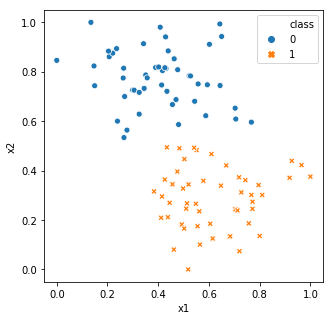

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
plot_points(data, ax)
plt.show()

## Network 1: Uma Rede Neural com Um Neurônio

Nesta primeira rede neural, chamada de `Network_1`, vamos implementar apenas uma camada que recebe os valores de entrada $x_1$ e $x_2$ e como saída tem apenas o valor da combinação linear dos valores de entrada com seus pesos.

In [13]:
from torch import nn
import torch.nn.functional as F

class Network_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=1)        
        
        self.fc1.weight =  torch.nn.Parameter(torch.tensor([[0.5, 0.5]]))
        self.fc1.bias =  torch.nn.Parameter(torch.tensor([[-0.25]]))
        
    def forward(self, x):
        x = self.fc1(x)       
        return x

In [14]:
model = Network_1()
model

Network_1(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

O shape e os valores iniciais dos pesos $W$ da camada `fc1` da Rede Neural são:

In [15]:
print(model.fc1.weight.shape)
print(model.fc1.weight)

torch.Size([1, 2])
Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)


### Passando uma Instância pela Rede Neural

Vamos selecionar a primeira instância do conjunto de dados $X$, `X[:1,]`, para passar pela nossa rede neural e ver qual é a saída.

In [16]:
input_data = torch.tensor(X, dtype=torch.float)[:1,]
y_true = torch.tensor(y, dtype=torch.float)[:1]

In [17]:
print('input_data', input_data)
print('y_true', y_true)

input_data tensor([[0.9650, 0.4222]])
y_true tensor([1.])


In [18]:
y_pred = model(input_data)
y_pred

tensor([[0.4436]], grad_fn=<AddmmBackward>)

O valor `y_pred` provem do seguinte cálculo:

In [19]:
0.9650 * 0.5 + 0.4222 * 0.5 + (-0.25)

0.4436

### Visualização dos Limites de Classificação

Visualizando o resultado do nosso modelo inicial, que é constituído pelos parâmetros $W=[0.5,0.5]$ e $bias=-0.25$

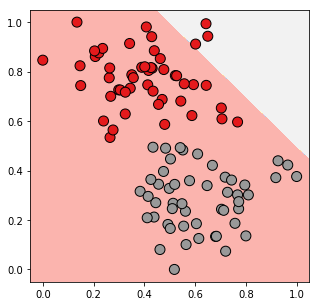

In [20]:
from helper import make_meshgrid, plot_contours
xx1, xx2 = make_meshgrid(X[:,0], X[:,1])

fig, ax = plt.subplots(figsize=(5,5))
plot_contours(ax, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')

### Calculando o Erro da Primeira Predição

Para calcular o erro da nossa predição vamos utilizar o MSE (Mean Square Error) ou Erro Médio Quadrático. Vamos calculá-lo manualmente primeiro e depois usar o do PyTorch.

$$
error = \frac{1}{n} \sum_{i=1}^{n}{(y_{true}[i] - y_{pred}[i])^2}
$$

Como neste exemplo estamos prevendo apenas um valor o erro será calculado apenas por:

$$
error = (y_{true} - y_{pred})^2
$$

In [21]:
y_true

tensor([1.])

In [22]:
y_pred

tensor([[0.4436]], grad_fn=<AddmmBackward>)

In [23]:
error = (y_pred.squeeze() - y_true)
mse = torch.mean(error**2)
mse

tensor(0.3096, grad_fn=<MeanBackward1>)

Usando PyTorch:

In [24]:
from torch import nn, optim
criterion = nn.MSELoss()

In [25]:
loss = criterion(y_pred.squeeze(), y_true)
loss

tensor(0.3096, grad_fn=<MseLossBackward>)

### Calculando o Gradiente

Agora a ideia consiste em usar o erro (a diferença encontrada entre o valor previsto e o observado) para ajustar os pesos, de forma que fique um pouco mais próximo de seus valores ideais.

Para isso vamos calcular o gradiente. E para calcular o gradiente calculamos a derivada do erro em relação aos pesos. Vamos relembrar como calculamos o erro e o valor predito:

$$
error = (y_{true} - y_{pred})^2\\
y_{pred} = (x_1 * w_1 + x_2 * w_2 + b)
$$

Para calcular a derivada parcial de $erro$ em relação a $w_1$ precisamos multiplicar a derivada de $erro$ em relação a $y_{pred}$ pela derivada de $y_{pred}$ em relação a $w_1$.

$$
\begin{align}
\frac{\partial error}{\partial w_1} &= \frac{\partial error}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\partial w_1} \\
\end{align}
$$

Sobre o cálculo da derivada de $erro$ em relação a $y_{pred}$

$$
\frac{\partial error}{\partial y_{pred}} = 2 \times (y_{true} - y_{pred})
$$

Lembre da função de $error = (y_{true} - y_{pred})^2$

Sobre o cálculo da derivada parcial de $y_{pred}$ em relação a $w_1$

$$
\frac{\partial y_{pred}}{\partial w_1} = x_1
$$

Lembra da função de $y_{pred} = (x_1 * w_1 + x_2 * w_2 + b)$

Portanto, a derivada parcial de $erro$ em relação a $w_1$ é:

$$
\begin{align}
\frac{\partial error}{\partial w_1} &= \frac{\partial error}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\partial w_1} \\
&= 2 \times (y_{true} - y_{pred}) \times x_1 \\
\end{align}
$$

E a derivada parcial de $erro$ em relação a $w_2$ é:

$$
\begin{align}
\frac{\partial error}{\partial w_2} &= \frac{\partial error}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\partial w_2} \\
&= 2 \times (y_{true} - y_{pred}) \times x_2 \\
\end{align}
$$

Primeiro vamos calcular os gradientes para $w_1$ e $w_2$ manualmente. Lembre que a variável que contém $x_1$ e $x_2$ no nosso exemplo é `input_data`.

In [26]:
grad = 2 * (y_pred - y_true) * input_data
grad

tensor([[-1.0739, -0.4698]], grad_fn=<MulBackward0>)

Esses valores serão usados para atualizar os erros $w_1$ e $w_2$ respectivamente.

Usando PyTorch

A variável `loss` contém o MSE calculado.

In [27]:
loss

tensor(0.3096, grad_fn=<MseLossBackward>)

Para calcular o gradiente apenas executamos a função `backward()` da seguinte forma:

In [28]:
print('Before backward pass: \n', model.fc1.weight.grad)
loss.backward()
print('After backward pass: \n', model.fc1.weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-1.0739, -0.4698]])


Os gradientes encontrados serão utilizados para atualizar o vetor de pesos $W = (x_1, x_2)$

### Atualizando os Pesos da Rede Neural

Os valores dos gradientes indicam para onde os nossos pesos devem ir. Junto com esse gradiente usamos uma taxa de aprendizado `lr` (*learning rate*) que consiste no tamanho do passo em relação ao gradiente.

Os nossos pesos iniciais e os gradientes calculados são:

In [29]:
print(model.fc1.weight)
print(grad)

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)
tensor([[-1.0739, -0.4698]], grad_fn=<MulBackward0>)


Utilizando uma taxa de aprendizado `lr=0.01` os novos pesos ficam da seguinte forma:

In [30]:
model.fc1.weight - grad * 0.01

tensor([[0.5107, 0.5047]], grad_fn=<SubBackward0>)

Usando PyTorch

Utilizamos o `optimizer` SGD (Stochastic Gradient Descendent). Esse algoritmo precisa do parâmetro *learning rate* ou `lr`. Essa taxa de aprendizado diz qual é o tamanho do passo, baseado no gradiente, com o qual os pesos devem ser atualizados.

In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [32]:
print('Before optimizer step pass: \n', model.fc1.weight)
optimizer.step()
print('After optimizer step pass: \n', model.fc1.weight)

Before optimizer step pass: 
 Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)
After optimizer step pass: 
 Parameter containing:
tensor([[0.5107, 0.5047]], requires_grad=True)


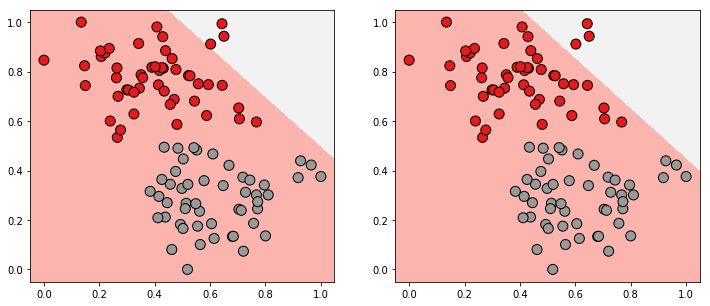

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_contours(ax1, Network_1(), xx1, xx2, cmap=plt.cm.Pastel1)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')
plot_contours(ax2, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')

### Utilizando um Batch de Dados para Treinar a Rede

Vamos utilizar um Batch de 20 instâncias para treinar a rede utilizando PyTorch

In [34]:
input_data = torch.tensor(X[:20,], dtype=torch.float)
y_true = torch.tensor(y[:20], dtype=torch.float)

In [35]:
optimizer.zero_grad()
# (1) Forward
y_pred = model(input_data)
# (2) Compute error
loss = criterion(y_pred.squeeze(), y_true)
# (3) Compute gradients
loss.backward()
# (4) Update weights
optimizer.step()        

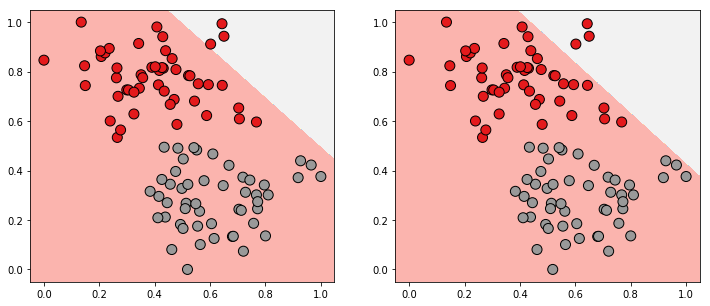

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_contours(ax1, Network_1(), xx1, xx2, cmap=plt.cm.Pastel1)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')
plot_contours(ax2, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')

### Implementando uma Função para Treinar a Rede Neural

In [37]:
def train_epoch(model, X, y, optimizer, criterion, batch_size=20):
    model.train()
    losses = []
    for batch_i in range(0, X.shape[0], batch_size):
        # (0) Prepare batch data
        input_data = torch.tensor(X[batch_i:batch_i + batch_size,:], dtype=torch.float)
        y_true = torch.tensor(y[batch_i:batch_i + batch_size], dtype=torch.float)
        
        optimizer.zero_grad()
        # (1) Forward
        y_pred = model(input_data)
        # (2) Compute error
        loss = criterion(y_pred.squeeze(), y_true)
        # (3) Compute gradients
        loss.backward()
        # (4) Update weights
        optimizer.step()        
        losses.append(loss.data.numpy())
    return losses

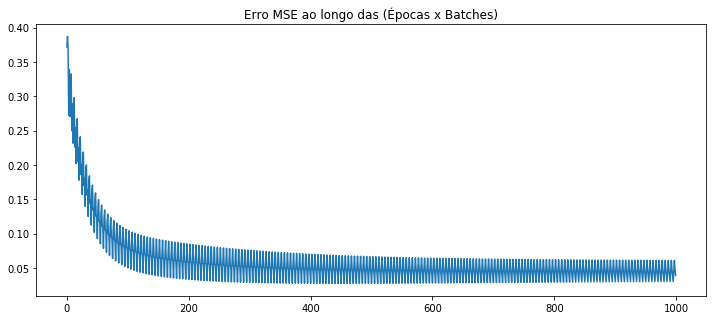

In [38]:
model = Network_1()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 200

e_losses = []
for e in range(num_epochs):
    e_losses += train_epoch(model, X, y, optimizer, criterion)
fig, ax = plt.subplots(figsize=(12,5))

plt.title('Erro MSE ao longo das (Épocas x Batches)')
plt.plot(e_losses)

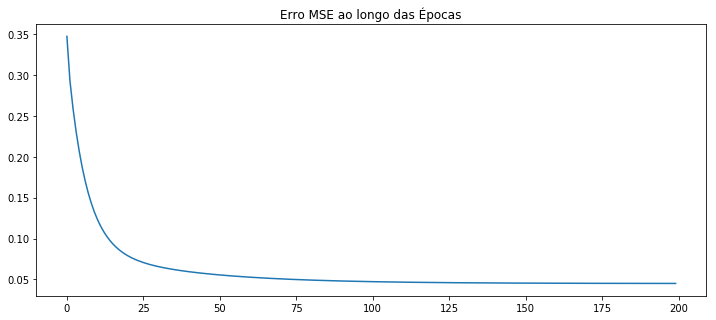

In [39]:
import numpy as np

model = Network_1()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 200

e_losses = []
for e in range(num_epochs):
    e_losses += [np.mean( train_epoch(model, X, y, optimizer, criterion) )]
fig, ax = plt.subplots(figsize=(12,5))

plt.title('Erro MSE ao longo das Épocas')
plt.plot(e_losses)

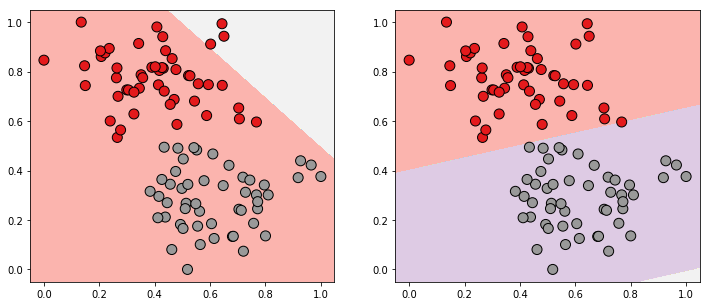

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_contours(ax1, Network_1(), xx1, xx2, cmap=plt.cm.Pastel1)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')
plot_contours(ax2, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')

### Função Resultante da Rede Neural

Observamos os pesos e o bias da camada `fc1` resultantes do ajuste.

In [48]:
model.fc1.weight

Parameter containing:
tensor([[ 0.3799, -1.5129]], requires_grad=True)

In [49]:
model.fc1.bias

Parameter containing:
tensor([[1.1062]], requires_grad=True)

A função resultante deste ajuste segue abaixo:

$$ f(X) = x_1 \times 0.3799 + x_2 \times -1.5129 + 1.1062 $$

Em geral as Redes Neurais tem mais do que uma camada e, por esse fato, geralmente não é possível mostrar o resultado nesse formato de fução. Mas essa é a ideia.

### Analisando os Resultados

* Nosso modelo se ajustou bem aos dados.

* No entatanto observamos que temos uma divisão do espaço em 3 cores, ao invés de 2 que são nossa possíveis classes. Tínhamos definidos que nossa saída de classificação seria ou 0 ou 1. E aqui temos valores 0, 1 e 2.

* Isso ocorre porque a nossa saída não é obrigatóriamente um valor entre 0 e 1, pois o nosso neurônio não contém nenhuma função de ativação.

* Vamos construir uma nova Rede Neural com Função de Ativação Sigmoidal.

## Network 2: Uma Rede Neural com Função de Ativação Sigmoidal

Arquitetura da Rede Neural:
* Input Layer: Dois nós, um para cada atributo.
* Output Layer: Um nó, para as duas classes com valores 0 e 1, com função de ativação sigmoidal $f_\sigma=\frac{1}{1 + e^{-x}}$

<div align="center">
<img src="img/neural_network_2.svg" width="50%">
</div>

### Implementação da Rede Neural

Nesta primeira rede neural, chamada de `Network_2`, vamos implementar apenas uma camada que recebe os valores de entrada $x_1$ e $x_2$ e como saída terá um valor entre 0 e 1. Para retornar um valor entre 0 e 1 vamos utilizar uma função de ativação sigmoidal.

In [52]:
from torch import nn

class Network_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=1)        
        
        self.fc1.weight =  torch.nn.Parameter(torch.tensor([[0.5, 0.5]]))
        self.fc1.bias =  torch.nn.Parameter(torch.tensor([[-0.25]]))
        
    def forward(self, x):
        x = torch.sigmoid( self.fc1(x) )
        return x

In [53]:
model = Network_2()
model

Network_2(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

### Treinamento da Rede Neural com 2000 Épocas

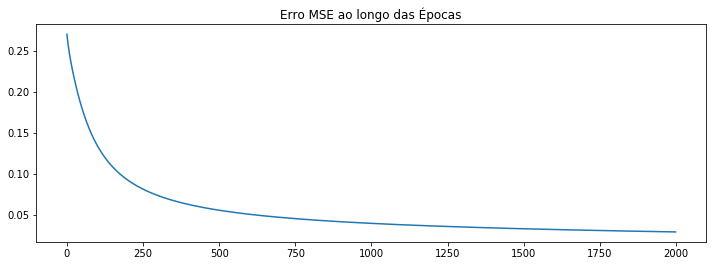

In [54]:
model = Network_2()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 2000

e_losses = []
for e in range(num_epochs):
    e_losses += [np.mean( train_epoch(model, X, y, optimizer, criterion) )]
fig, ax = plt.subplots(figsize=(12,4))

plt.title('Erro MSE ao longo das Épocas')
plt.plot(e_losses)

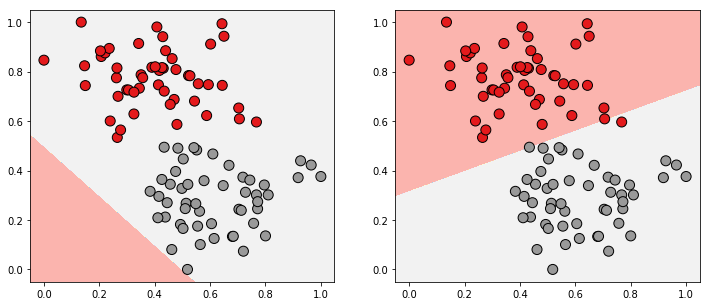

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_contours(ax1, Network_2(), xx1, xx2, cmap=plt.cm.Pastel1)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')
plot_contours(ax2, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')

### Treinamento da Rede Neural com 10000 Épocas

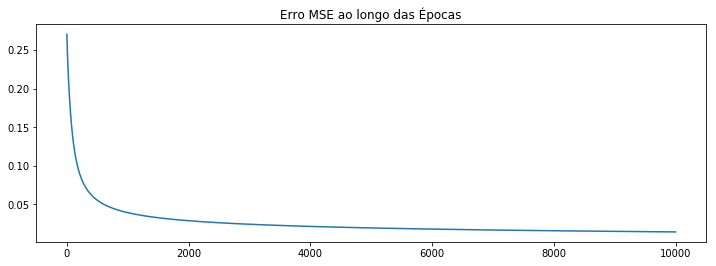

In [56]:
model = Network_2()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 10000

e_losses = []
for e in range(num_epochs):
    e_losses += [np.mean( train_epoch(model, X, y, optimizer, criterion) )]
fig, ax = plt.subplots(figsize=(12,4))

plt.title('Erro MSE ao longo das Épocas')
plt.plot(e_losses)

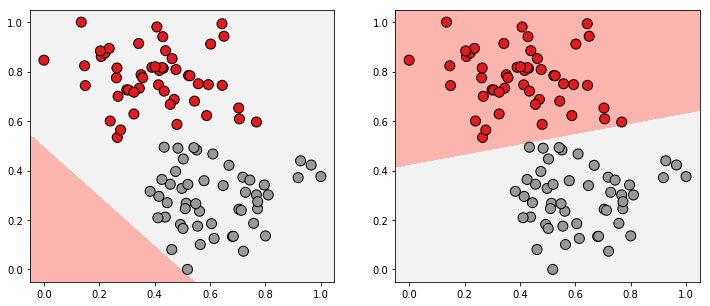

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_contours(ax1, Network_2(), xx1, xx2, cmap=plt.cm.Pastel1)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')
plot_contours(ax2, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')

### Função Resultante da Rede Neural

Observamos os pesos e o bias da camada `fc1` resultantes do ajuste.

In [59]:
model.fc1.weight

Parameter containing:
tensor([[  3.1542, -15.1488]], requires_grad=True)

In [60]:
model.fc1.bias

Parameter containing:
tensor([[6.3650]], requires_grad=True)

A função resultante deste ajuste segue abaixo:

$$ f(X) = f_{\sigma} (x_1 \times 3.1542 + x_2 \times -15.1488 + 6.3650) $$

## Testando Network_2 com um Novo Conjunto de Dados

In [61]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05, factor = 0.5, random_state=0)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [62]:
import pandas as pd
data = pd.concat( [
    pd.DataFrame(X,columns=['x1','x2']), 
    pd.DataFrame(y, columns=['class'])
    ], 
    axis = 1 )

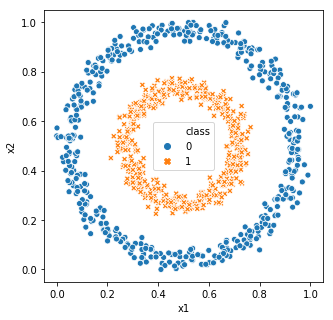

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
plot_points(data, ax)
plt.show()

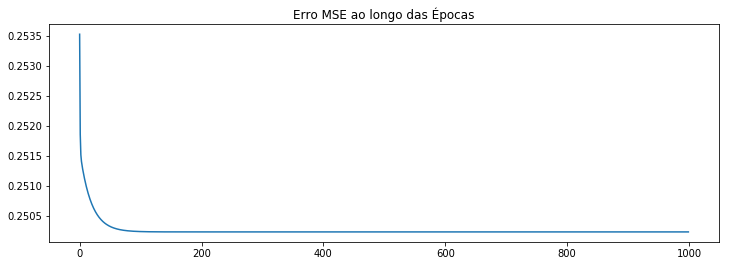

In [64]:
model = Network_2()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 1000

e_losses = []
for e in range(num_epochs):
    e_losses += [np.mean( train_epoch(model, X, y, optimizer, criterion) )]
fig, ax = plt.subplots(figsize=(12,4))

plt.title('Erro MSE ao longo das Épocas')
plt.plot(e_losses)

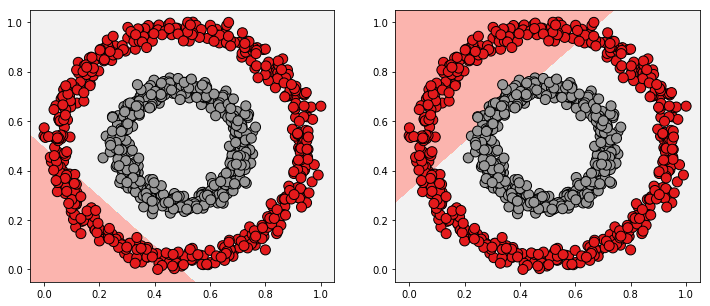

In [65]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_contours(ax1, Network_2(), xx1, xx2, cmap=plt.cm.Pastel1)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')
plot_contours(ax2, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')

## Network_3: Uma Rede Neural com Uma Camada Escondida

Arquitetura da Rede Neural:
* Input Layer: Dois nós, um para cada atributo.
* Hidden Layer: Três nós, com função de ativação sigmoidal $f_\sigma=\frac{1}{1 + e^{-x}}$
* Output Layer: Um nó, para as duas classes com valores 0 e 1, com função de ativação $f_\sigma$

<div align="center">
<img src="img/neural_network_3.svg" width="70%">
</div>

In [66]:
from torch import nn

class Network_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=3)        
        self.fc2 = nn.Linear(in_features=3, out_features=1)                
                
    def forward(self, x):
        x = torch.sigmoid( self.fc1(x) )
        x = torch.sigmoid( self.fc2(x) )
        return x

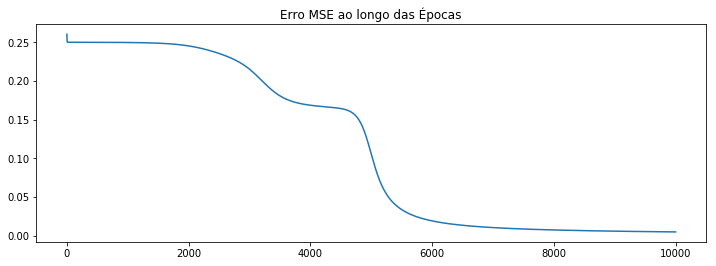

In [67]:
model = Network_3()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)
num_epochs = 10000

e_losses = []
for e in range(num_epochs):
    e_losses += [np.mean( train_epoch(model, X, y, optimizer, criterion) )]
fig, ax = plt.subplots(figsize=(12,4))

plt.title('Erro MSE ao longo das Épocas')
plt.plot(e_losses)

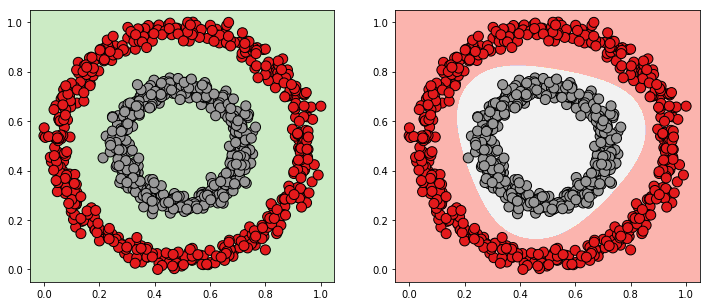

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
plot_contours(ax1, Network_3(), xx1, xx2, cmap=plt.cm.Pastel1)
ax1.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')
plot_contours(ax2, model, xx1, xx2, cmap=plt.cm.Pastel1)
ax2.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, s=100, edgecolors='k')